#  **Support Vector Machine (SVM)**


## Importing the Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset 

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values



## Splitting the dataset into Training set and Test set

In [8]:
!git clone https://github.com/scikit-learn/scikit-learn

Cloning into 'scikit-learn'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 163976 (delta 6), reused 11 (delta 6), pack-reused 163899
Receiving objects: 100% (163976/163976), 95.47 MiB | 26.64 MiB/s, done.
Resolving deltas: 100% (122567/122567), done.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



## Fitting classifier to the Training set

In [11]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


## Predicting the Test Set Results

In [0]:
Y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))


[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

   micro avg       0.93      0.93      0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100




##  Visulaising the Training Set Results

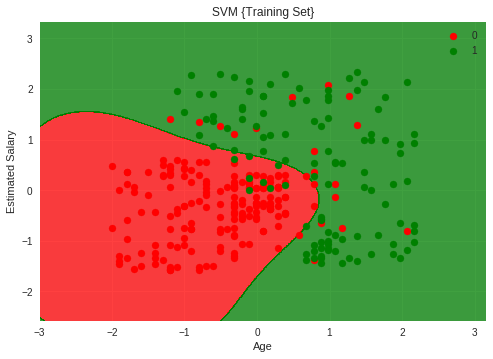

In [14]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap =ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM {Training Set}')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
#X_set, Y_set = X_train, Y_train
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1))


## Visulaising the Test Set Results

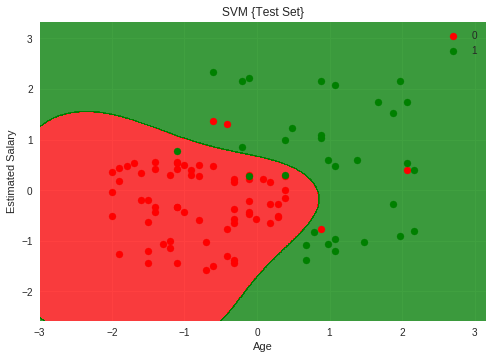

In [15]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap =ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM {Test Set}')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Accuracy

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred)) 

0.93
